# 기계학습 특강
> 중간고사 대체과제

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Special Topics in Machine Learning]

In [ ]:
import torch 
import pandas as pd
import matplotlib.pyplot as plt
from fastai.vision.all import *

## `1`. 크롤링을 통한 이미지 분석 및 CAM 

`(1)` 두 가지 키워드로 크롤링을 수행하여 이미지자료를 모아라. (키워드는 각자 마음에 드는 것으로 설정할 것) 

***힌트1: `hynn`, `iu` 라는 키워드로 크롤링하여 이미지자료를 모으는 코드***

In [ ]:
#
# 크롤링에 필요한 준비작업들
#!pip install -Uqq duckduckgo_search
from duckduckgo_search import ddg_images
from fastdownload import download_url
from fastcore.all import *
def search_images(term, max_images=200): return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [ ]:
# 
# 폴더만드는코드 -- 사실 손으로 만들어도 무방함.. 
!mkdir images
!mkdir images/train
!mkdir images/test 
!mkdir images/train/iu
!mkdir images/train/hynn
!mkdir images/test/iu
!mkdir images/test/hynn

In [ ]:
download_images(dest='./images/train/iu',urls=search_images('iu',max_images=200)) # iu 라는 키워드로 200개 이미지 크롤링 -> ./images/train/iu 에 저장
time.sleep(10) # 서버과부하를 위한 휴식코드 
download_images(dest='./images/train/hynn',urls=search_images('hynn',max_images=200)) # hynn 이라는 키워드로 200개 이미지 크롤링 -> ./images/train/hynn 에 저장
time.sleep(10) # 서버과부하를 위한 휴식코드 
download_images(dest='./images/train/iu',urls=search_images('iu kpop',max_images=200))  # iu kpop 이라는 키워드로 200개 이미지 크롤링 -> ./images/train/iu 에 저장
time.sleep(10) # 서버과부하를 위한 휴식코드 
download_images(dest='./images/train/hynn',urls=search_images('hynn kpop',max_images=200)) # hynn kpop 이라는 키워드로 200개 이미지 크롤링 -> ./images/train/hynn 에 저장
time.sleep(10) # 서버과부하를 위한 휴식코드 

In [ ]:
download_images(dest='./images/test/iu',urls=search_images('iu photo',max_images=50)) # iu photo 라는 키워드로 50개 이미지 크롤링 -> ./images/test/iu 에 저장
time.sleep(10) # 서버과부하를 위한 휴식코드 
download_images(dest='./images/test/hynn',urls=search_images('hynn photo',max_images=50)) # hynn photo 라는 키워드로 50개 이미지 크롤링 -> ./images/test/hynn 에 저장 
time.sleep(10) # 서버과부하를 위한 휴식코드 

***힌트2: 불량이미지 삭제***

In [ ]:
bad_images = verify_images(get_image_files('./images'))
bad_images

(#11) [Path('images/train/iu/b6f25ccd-4629-4686-8867-ea2b0de61e9e.jpg'),Path('images/train/iu/3bd8e46c-bb07-43ea-8e1a-5772e2ce25a1.jpg'),Path('images/train/iu/3970a84d-4625-435c-bc1d-1446b2b00709.jpg'),Path('images/train/iu/e794b8bd-78f9-43f0-a3a8-21d688a551fd.jpg'),Path('images/train/hynn/a26b0c36-8188-4c46-b9f5-03c46b0ad863.png'),Path('images/train/hynn/4024807e-da9a-45e6-a238-f5c3f66a043e.jpg'),Path('images/train/hynn/356d6cbb-b091-4ffb-8006-6e762947f7b3.jpg'),Path('images/train/hynn/4af71c78-5ed5-429b-aa15-92d24af461a5.jpg'),Path('images/train/hynn/d0892ddb-77f3-4ef6-98f6-09e8b53a9ea1.png'),Path('images/train/hynn/9959d239-6157-47f3-a6f5-318b6f00ca7d.jpg')...]

- 불량이미지 목록 

In [ ]:
bad_images.map(Path.unlink)

(#11) [None,None,None,None,None,None,None,None,None,None...]

- 불량이미지는 dls를 불러올때 방해되므로 제거 

`(2)` ImageDataLoaders.from_folder 를 이용하여 dls를 만들어라. 

***힌트1: dls를 만드는 코드***

In [ ]:
dls = ImageDataLoaders.from_folder(path = './images', train='train',valid='test',item_tfms=Resize(512),bs=8) 

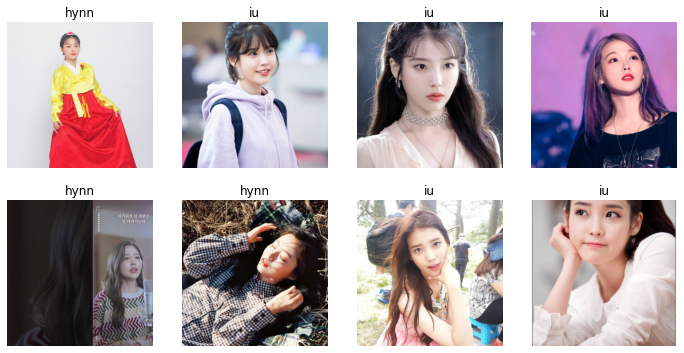

In [ ]:
dls.show_batch()

`(3)` resnet34를 이용하여 학습하라. 

`(4)` CAM (class activation mapping)을 이용하여 (3)의 모형의 판단근거를 시각화하라. 

## `2`. Overparameterized Model  

(풀이 있음)

아래와 같은 자료가 있다고 가정하자. 

In [ ]:
x = torch.rand([1000,1])*2-1
y = 3.14 + 6.28*x + torch.randn([1000,1]) 

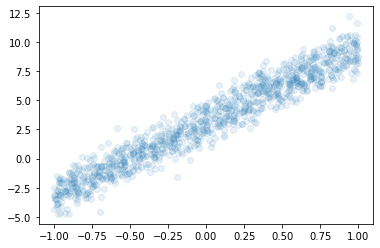

In [ ]:
plt.plot(x,y,'o',alpha=0.1)

`(1)` 아래의 모형을 가정하고 $\beta_0,\beta_1$을 파이토치를 이용하여 추정하라. 

- $y_i = \beta_0  + \beta_1 x_i + \epsilon_i,\quad \epsilon_i \sim N(0,\sigma^2)$

`(2)` 아래의 모형을 가정하고 $\beta_0$를 파이토치를 이용하여 추정하라. 

- $y_i = \beta_0  + \epsilon_i,\quad \epsilon_i \sim N(0,\sigma^2)$

`(3)` 아래의 모형을 가정하고 $\beta_1$을 파이토치를 이용하여 추정하라. 

- $y_i = \beta_1x_i  + \epsilon_i \quad \epsilon_i \sim N(0,\sigma^2)$

`(4)` 아래의 모형을 가정하고 $\alpha_0,\beta_0,\beta_1$을 파이토치를 이용하여 추정하라. 

- $y_i = \alpha_0+\beta_0+ \beta_1x_i  + \epsilon_i \quad \epsilon_i \sim N(0,\sigma^2)$

$\hat{\alpha}_0+\hat{\beta}_0$은 얼마인가? 이 값과  문제 (1)에서 추정된 $\hat{\beta_0}$의 값과 비교하여 보라. 

`(5)` 아래의 모형을 가정하고 $\alpha_0,\alpha_1,\beta_0,\beta_1$을 파이토치를 이용하여 추정하라. -- 이거 제가 힌트를 잘못줬어요.. 문제가 좀 어렵게나왔네요 ㅠㅠ

- $y_i = \alpha_0+\beta_0+ \beta_1x_i + \alpha_1x_i + \epsilon_i \quad \epsilon_i \sim N(0,\sigma^2)$ 

$\hat{\alpha}_0+\hat{\beta}_0$, $\hat{\alpha}_1 + \hat{\beta}_1$의 값은 각각 얼마인가? 이 값들을 (1) 에서 추정된 $\hat{\beta}_0$, $\hat{\beta}_1$ 값들과 비교하라. 

`(6)` 다음은 위의 모형에 대하여 학생들이 discussion한 결과이다. 올바르게 해석한 학생을 모두 골라라. 

**민정**: $(x_i,y_i)$의 산점도는 직선모양이고 직선의 절펴과 기울기 모두 유의미해 보이므로 $y_i = \beta_0 + \beta_1 x_i$ 꼴을 적합하는게 좋겠다. 

**슬기**: 나도 그렇게 생각해. 그래서 (2)-(3)과 같이 기울기를 제외하고 적합하거나 절편을 제외하고 적합하면 underfitting의 상황에 빠질 수 있어. 

**성재**: (2)의 경우 사실상 $\bar{y}=\frac{1}{n}\sum_{i=1}^{n}y_i$를 추정하는 것과 같아지게 되지. 

**세민**: (4)의 경우 ${\bf X}=\begin{bmatrix} 1  & x_1 \\ 1 & x_2 \\ \dots & \dots \\ 1 & x_n \end{bmatrix}$ 와 같이 설정하고 네트워크를 아래와 같이 설정할 경우 얻어지는 모형이야. 
```python
net = torch.nn.Linear(in_features=2,out_features=1,bias=True)
```

**구환**: 모델 (4)-(5)는 표현력은 (1)과 동일하지만 추정할 파라메터는 (1)보다 많으므로 효율적인 모델이라고 볼 수 없어. 

***이 문제의 경우 풀이를 [여기](https://guebin.github.io/DL2022/2022/10/26/Assignment-2.html)에서 확인할 수 있습니다.***

## `3`. 차원축소기법과 표현학습

다음은 아이리스데이터를 불러오는 코드이다. (아이리스 데이터에 대한 자세한 설명은 생략한다. 잘 모르는 학생은 구글검색을 해볼 것)

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/STML2022/master/_notebooks/iris.csv")
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
X = torch.tensor(df.drop(columns=['Species']).to_numpy(), dtype=torch.float32)

`(1)` 아래를 만족하도록 적당한 아키텍처, 손실함수를 설계하라. (손실함수는 MSE를 이용)

- $\underset{(150,4)}{\bf X} \overset{l_1}{\to} \underset{(150,2)}{\bf Z} \overset{l_2}{\to} \underset{(150,4)}{\bf \hat X}$

- ${\bf \hat X} \approx {\bf X}$


차원축소

`(2)` 아래코드를 이용하여 ${\bf X}$, ${\bf Z}$, ${\bf \hat{X}}$를 시각화 하라. 

(시각화예시)

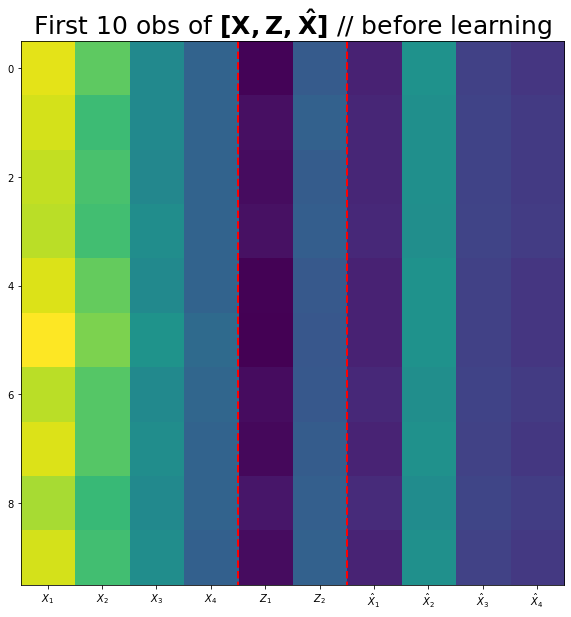

In [ ]:
fig,ax = plt.subplots(figsize=(10,10)) 
ax.imshow(torch.concat([X,Z,Xhat],axis=1)[:10])
ax.set_xticks(np.arange(0,10)) 
ax.set_xticklabels([r'$X_1$',r'$X_2$',r'$X_3$',r'$X_4$',r'$Z_1$',r'$Z_2$',r'$\hat{X}_1$',r'$\hat{X}_2$',r'$\hat{X}_3$',r'$\hat{X}_4$'])
ax.vlines([3.5,5.5],ymin=-0.5,ymax=9.5,lw=2,color='red',linestyle='dashed')
ax.set_title(r'First 10 obs of $\bf [X, Z, \hat{X}]$ // before learning',size=25);

`(3)` 네트워크를 학습시키고 ${\bf X}, {\bf Z}, {\bf \hat{X}}$를 시각화하라. 

(시각화예시)

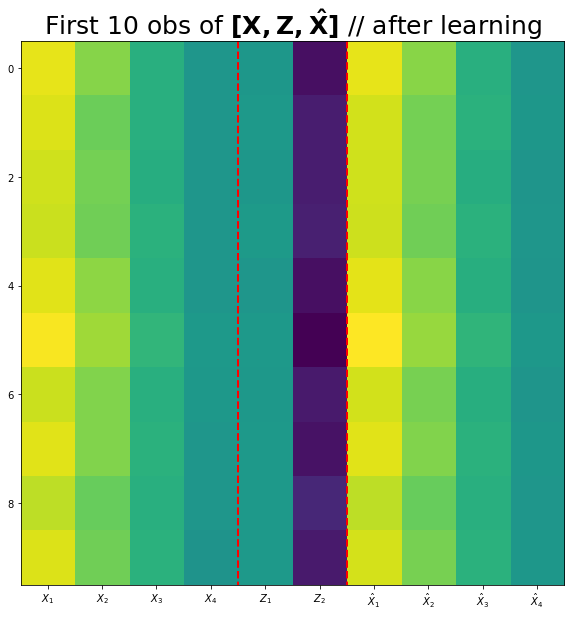

In [ ]:
fig,ax = plt.subplots(figsize=(10,10)) 
ax.imshow(torch.concat([X,Z,Xhat],axis=1)[:10])
ax.set_xticks(np.arange(0,10)) 
ax.set_xticklabels([r'$X_1$',r'$X_2$',r'$X_3$',r'$X_4$',r'$Z_1$',r'$Z_2$',r'$\hat{X}_1$',r'$\hat{X}_2$',r'$\hat{X}_3$',r'$\hat{X}_4$'])
ax.vlines([3.5,5.5],ymin=-0.5,ymax=9.5,lw=2,color='red',linestyle='dashed')
ax.set_title(r'First 10 obs of $\bf [X, Z, \hat{X}]$ // after learning',size=25);

`(4)` (3)의 결과로 학습된 $Z$를 입력벡터로 하고 $Z \to y=\text{Species}$ 로 향하는 적당한 네트워크를 설계한 뒤 학습하라. 

x->y가는 mapping 안 찾아도
- z->y 가는 mapping 적절히 잘 찾으면
- x->y 적용가능한 linear function 찾기 가능

`(5)` (1)~(4)의 결과를 토의한 내용이다. 적절하게 토의한 사람을 모두 고르라. 

**규빈**: ${\bf Z}$는 ${\bf X}$보다 적은 feature를 가지고 있다. 또한 적절한 선형변환을 하면 ${\bf X}$와 비슷한 ${\bf \hat X}$을 만들 수 있으므로 ${\bf X}$의 정보량 대부분 유지한채로 효과적으로 차원을 줄인 방법이라 볼 수 있다. 

**민정**: 즉 ${\bf X}$에서 ${\bf y}$로 가는 맵핑을 학습하는 과업은 ${\bf Z}$에서 ${\bf y}$로 가는 맵핑을 학습하는 과업은 거의 동등하다고 볼 수 있다. 

**성재**: ${\bf Z}$의 차원을 (n,4)로 설정한다면 이론상 ${\bf X}$와 동일한 ${\bf \hat X}$을 만들어 낼 수 있다. 

**슬기**: ${\bf Z}$의 차원이 (n,2)일지라도 경우에 따라서 ${\bf X}$와 동일한 ${\bf \hat X}$을 만들어 낼 수 있다. 